In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [53]:
df = pd.read_csv("updated_dataset.csv")

In [54]:
X = df[["norm_power", "norm_temp_diff", "norm_tool_wear_adjusted"]]
y = df["Machine_Failure_Binary"]

In [55]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

model_SVC = SVC(kernel='linear', class_weight='balanced', random_state=42)

skf = StratifiedKFold(n_splits=5)
scores = []
confusion_matrices = []

for fold_index, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_SVC.fit(X_train, y_train)
    y_pred = model_SVC.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)
    
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
    print(f"Fold {fold_index}: Accuracy = {acc}")

print(f"Mean Accuracy: {sum(scores) / len(scores)}")

Fold 1: Accuracy = 0.8303548303548304
Fold 2: Accuracy = 0.668997668997669
Fold 3: Accuracy = 0.6055426055426055
Fold 4: Accuracy = 0.7940947940947941
Fold 5: Accuracy = 0.8404145077720208
Mean Accuracy: 0.7478808813523841


## Decision Tree

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
dt_model = DecisionTreeClassifier(
    criterion="gini",  
    max_depth=5,  
    min_samples_split=10,  
    min_samples_leaf=5,  
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

Decision Tree Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1976
           1       0.88      0.87      0.88      1885

    accuracy                           0.88      3861
   macro avg       0.88      0.88      0.88      3861
weighted avg       0.88      0.88      0.88      3861



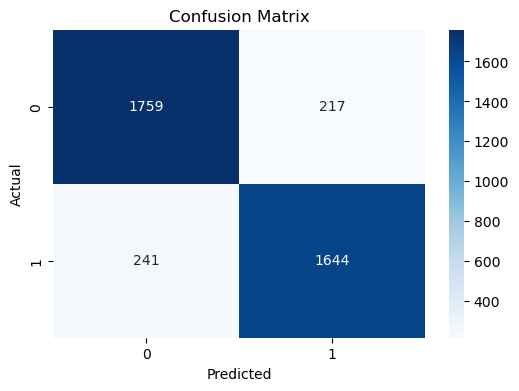

In [58]:
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.9080549080549081
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1976
           1       0.91      0.91      0.91      1885

    accuracy                           0.91      3861
   macro avg       0.91      0.91      0.91      3861
weighted avg       0.91      0.91      0.91      3861



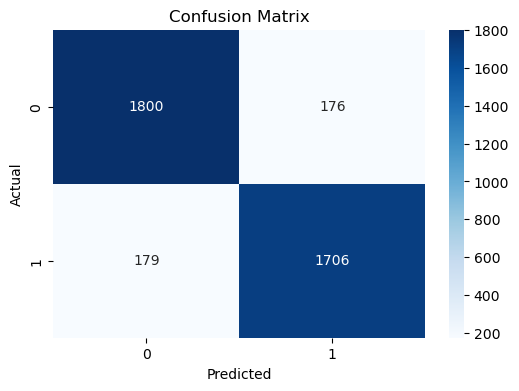

In [59]:
dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [60]:
y_train_pred = dt_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.9297


In [61]:
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

y_test_pred = dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))

Training Accuracy: 0.9297
Test Accuracy: 0.9081
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      1976
           1       0.91      0.91      0.91      1885

    accuracy                           0.91      3861
   macro avg       0.91      0.91      0.91      3861
weighted avg       0.91      0.91      0.91      3861



In [62]:
cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.9018389  0.88344988 0.78036778 0.9049469  0.92720207]
Mean Cross-Validation Accuracy: 0.8796


In [63]:
dt_model = DecisionTreeClassifier(max_depth=8, random_state=42)
dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

y_test_pred = dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))

Training Accuracy: 0.9055
Test Accuracy: 0.8946
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      1976
           1       0.90      0.88      0.89      1885

    accuracy                           0.89      3861
   macro avg       0.89      0.89      0.89      3861
weighted avg       0.89      0.89      0.89      3861



In [64]:
cv_scores = cross_val_score(dt_model, X, y, cv=10, scoring='accuracy')
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Mean CV Accuracy: 0.8712


In [65]:
param_grid = {
    'max_depth': [6, 8, 10, 12, 15],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'criterion': ['gini', 'entropy']  
}

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Params: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

Best Params: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Accuracy: 0.9164


In [66]:
ensemble_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
ensemble_model.fit(X_train, y_train)

test_acc = ensemble_model.score(X_test, y_test)
print(f"Ensemble Test Accuracy: {test_acc:.4f}")

Ensemble Test Accuracy: 0.9060


Accuracy: 0.8945868945868946
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1976
           1       0.90      0.88      0.89      1885

    accuracy                           0.89      3861
   macro avg       0.89      0.89      0.89      3861
weighted avg       0.89      0.89      0.89      3861



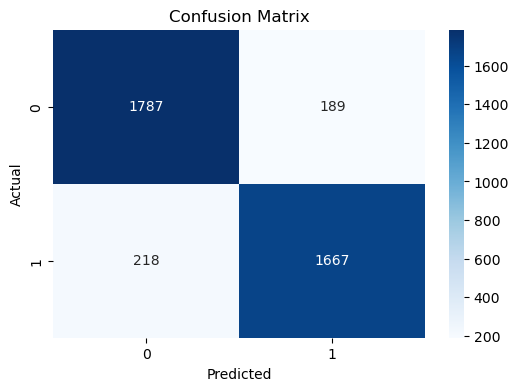

In [92]:
DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=8,  
    min_samples_leaf=2,  
    min_samples_split=5,  
    random_state=42
)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [91]:
cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.9010619  0.85780886 0.77207977 0.89070189 0.91554404]
Mean Cross-Validation Accuracy: 0.8674


## Random Forest

In [68]:
rf_model = RandomForestClassifier(
    n_estimators=100,  
    criterion='entropy',  
    max_depth=8,  
    min_samples_leaf=2,  
    min_samples_split=5,  
    random_state=42,
    n_jobs=-1  
)

In [69]:
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.8991
Test Accuracy: 0.8941


In [70]:
rf_model = RandomForestClassifier(
    n_estimators=300,  
    max_depth=5,  
    min_samples_leaf=5,  
    min_samples_split=8,  
    criterion='entropy',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.8847
Test Accuracy: 0.8832


In [71]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 8, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9261156921518274


In [72]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, 
                                   n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Parameters: {'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 160}
Best Accuracy: 0.931166436310022


In [73]:
best_rf = RandomForestClassifier(
    max_depth=18,
    min_samples_leaf=1,
    min_samples_split=3,
    n_estimators=160,
    random_state=42
)

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9306
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      1976
           1       0.93      0.93      0.93      1885

    accuracy                           0.93      3861
   macro avg       0.93      0.93      0.93      3861
weighted avg       0.93      0.93      0.93      3861



In [74]:
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.91403418 0.90523045 0.89124806 0.85085448 0.6373057  0.89378238
 0.88238342 0.90310881 0.93005181 0.90362694]
Mean CV Accuracy: 0.8712
Standard Deviation: 0.0804


In [78]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=160, max_depth=18, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42))
]

stack_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stack_model.fit(X_train, y_train)
stack_pred = stack_model.predict(X_test)
print("Stacking Test Accuracy:", accuracy_score(y_test, stack_pred))

Stacking Test Accuracy: 0.9380989380989381


In [79]:
train_pred = stack_model.predict(X_train)
test_pred = stack_model.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9707
Test Accuracy: 0.9381


In [80]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(stack_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Scores: [0.9404338  0.94075753 0.93881515 0.94365285 0.94332902]
Mean CV Accuracy: 0.9414
Standard Deviation: 0.0018


In [81]:
import numpy as np

y_probs = stack_model.predict_proba(X_test)
confidences = np.max(y_probs, axis=1)  # Take the max probability for each sample

print(f"Average Confidence: {np.mean(confidences):.4f}")
print(f"Confidence Standard Deviation: {np.std(confidences):.4f}")

Average Confidence: 0.9482
Confidence Standard Deviation: 0.0930


In [83]:
best_rf = RandomForestClassifier(
    max_depth=12,  
    min_samples_leaf=3,  
    min_samples_split=6,  
    n_estimators=120,
    random_state=42
)

xgb_model = XGBClassifier(
    learning_rate=0.05,  
    max_depth=6,  
    n_estimators=150,  
    colsample_bytree=0.8,  
    subsample=0.8,  
    reg_lambda=2,  
    random_state=42
)

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9101
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1976
           1       0.92      0.90      0.91      1885

    accuracy                           0.91      3861
   macro avg       0.91      0.91      0.91      3861
weighted avg       0.91      0.91      0.91      3861

